### Load GeometricIntegrators.jl Library

In [1]:
using GeometricIntegrators

┌ Info: Precompiling GeometricIntegrators [dcce2d33-59f6-5b8d-9047-0defad88ae06]
└ @ Base loading.jl:1273


### Define Equations

In [2]:
const k = 0.5;

In [3]:
q₀=[0.5, 0.0];

In [4]:
function s1(t, q, s, h, k)
    s[1] = q[1] + h * q[2]
    s[2] = q[2]
    nothing
end

s1 (generic function with 1 method)

In [5]:
function s2(t, q, s, h, k)
    s[1] = q[1]
    s[2] = q[2] - h * k*q[1]
    nothing
end

s2 (generic function with 1 method)

In [6]:
function hamiltonian(t, q, κ)
    q[2]^2 / 2 + κ * q[1]^2 / 2
end

hamiltonian (generic function with 1 method)

In [7]:
s1_k(t,q,s,h) = s1(t,q,s,h,k)
s2_k(t,q,s,h) = s2(t,q,s,h,k)

s2_k (generic function with 1 method)

In [8]:
ode = SODE((s1_k, s2_k), q₀)

SODE{Float64,Float64,Tuple{typeof(s1_k),typeof(s2_k)},Nothing,1}(2, 1, (s1_k, s2_k), 0.0, [0.5, 0.0], nothing, [0.0, 0.0])

### Create Integrator

In [9]:
Δt = 0.1;

In [10]:
#tab = getTableauLieA()
#tab = getTableauLieB()
#tab = getTableauStrang()

In [11]:
# Define our own tableau

tab = TableauSplittingNS(:Strang, 2, [0.5], [0.5])

# See McLachlan, Quispel, 2003, Section 4 four details.
# For Strang splitting, we have two coefficients a₀=1/2 and b₀=1/2 and the splitting is
# φ(τ) = φ_B(b₀τ) ∘ φ_A(a₀τ)
# The methods A and B are the composition of all vector fields in the SODE and its adjoint, respectively.
# I.e., for two vector fields v1 and v2 we have
# φ_A = φ_v2 ∘ φ_v1    and   φ_B = φ_v1 ∘ φ_v2
# (or the other way around)

TableauSplittingNS{Float64}(:Strang, 2, 1, [0.5], [0.5])

In [12]:
int = Integrator(ode, tab, Δt)

IntegratorSplitting{Float64,Float64,Tuple{typeof(s1_k),typeof(s2_k)},TableauSplittingNS{Float64},NTuple{4,Int64},NTuple{4,Float64},Nothing,2}(SODE{Float64,Float64,Tuple{typeof(s1_k),typeof(s2_k)},Nothing,1}(2, 1, (s1_k, s2_k), 0.0, [0.5, 0.0], nothing, [0.0, 0.0]), TableauSplittingNS{Float64}(:Strang, 2, 1, [0.5], [0.5]), (1, 2, 2, 1), (0.5, 0.5, 0.5, 0.5), 0.1, GeometricIntegrators.Integrators.IntegratorCacheSplitting{Float64,Float64,2}([0.0, 0.0], [0.0, 0.0], [0.0, 0.0]))

### Create Solution

In [13]:
nt = 100;

In [14]:
nq = 10;

In [15]:
q = zeros(2, nq, nt+1)
q[:,:,1] .= rand(2,nq)

2×10 view(::Array{Float64,3}, :, :, 1) with eltype Float64:
 0.135694  0.04603   0.145896  0.280199   …  0.963503  0.933747  0.246934
 0.158219  0.448535  0.462613  0.0358072     0.931975  0.198104  0.188763

In [16]:
t = collect(range(0, stop=Δt*nt, step=Δt));

In [17]:
sol = AtomicSolution(ode)

AtomicSolutionODE{Float64,Float64}(0.0, 0.0, [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0])

### Integrate

In [18]:
for i in 1:nt
    sol.t = t[i+1]
    for k in 1:nq
        sol.q .= q[:,k,i]
        integrate_step!(int, sol)
        q[:,k,i+1] .= sol.q
    end
end

### Plot Solution

In [19]:
using Plots

In [20]:
include("pic_plot_recipes.jl")

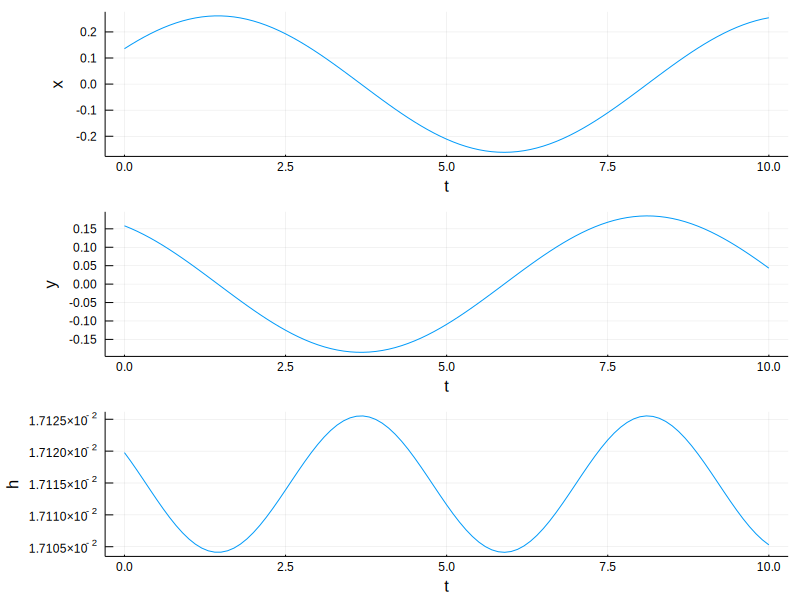

In [21]:
plotoscillator(t, q[:,1,:])

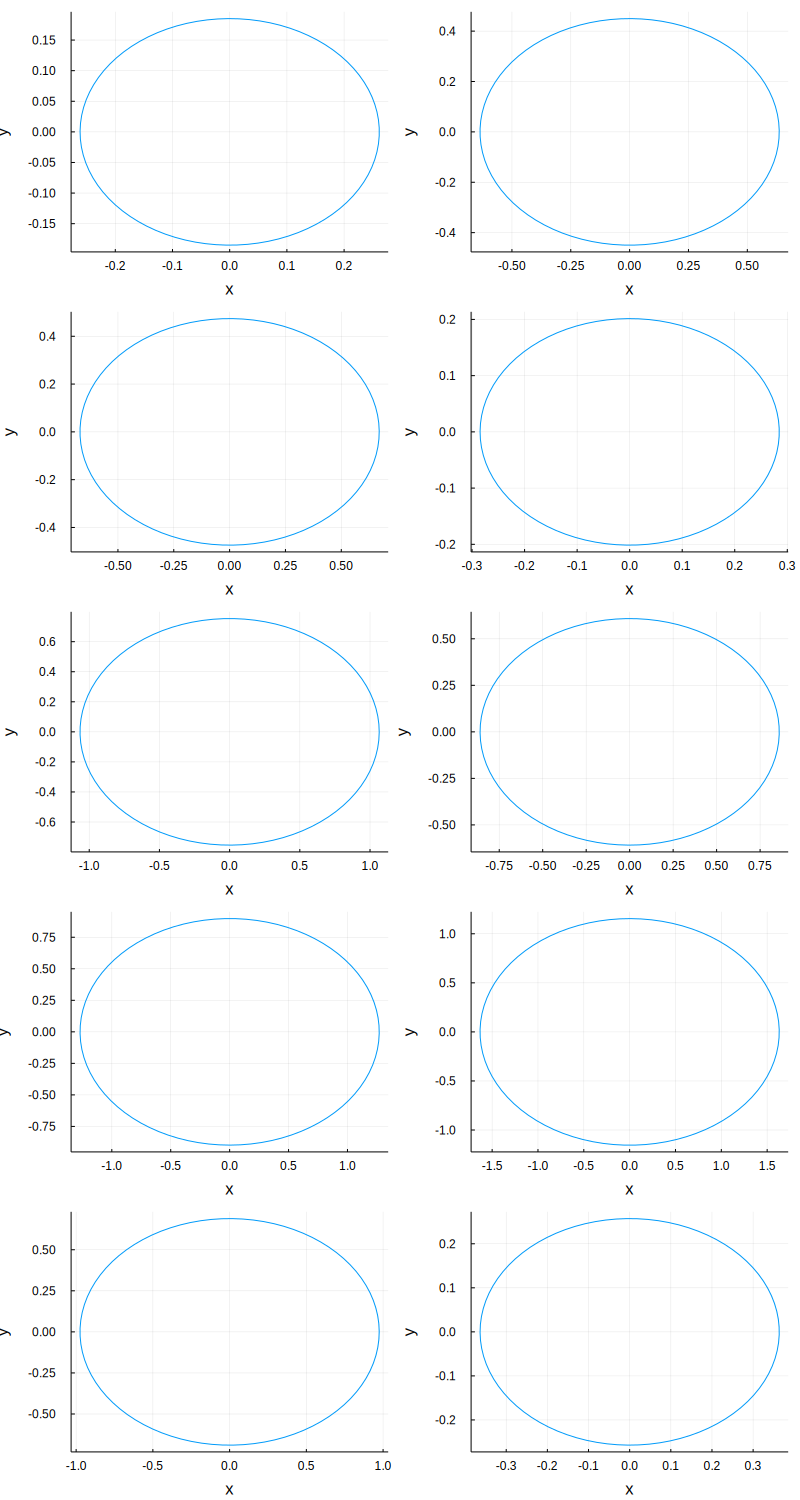

In [22]:
plotoscillatoroverview(q)